In [ ]:
# TASK 1

In [3]:
import pandas as pd

data1 = pd.read_csv('Lab2 D1A.csv')
data2 = pd.read_csv('Lab2 D1B.csv')
#data3 = pd.read_csv('Lab2 D1C.csv')

mergeddata = data1.merge(data2, on=list(data1.columns.intersection(data2.columns)), how='outer')
print(mergeddata.shape)
mergeddata.columns

(27033, 9)


Index(['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level',
       'enrollment', 'level.1'],
      dtype='object')

In [4]:
data3 = pd.read_csv('Lab2 D1C.csv')
comboAC = pd.merge(data1, data3,  how='inner')
print(comboAC.shape)
comboAC.columns

(4221333, 7)


Index(['fid', 'name', 'population', 'county', 'latitude', 'city', 'score'], dtype='object')

In [1]:
# TASK 2

In [5]:
import numpy as np

c1 = data1[['county']]

customizedData = pd.DataFrame(c1)

customizedData['Size'] = np.random.choice(['small', 'medium', 'high'], size=len(customizedData))
customizedData['cardinal direction'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(customizedData))
customizedData['Timings'] = np.random.choice(['full time', 'part time'], size=len(customizedData))
customizedData['Department'] = np.random.choice(['HR','Sales','Marketing'], size=len(customizedData))
customizedData['Revenue'] = np.random.uniform(1000, 5000, size=len(customizedData))

customizedData

,county,Size,cardinal direction,Timings,Department,Revenue
0,BRISTOL,high,East,part time,HR,3334.213895
1,BRISTOL,small,West,full time,Sales,1938.621961
2,WORCESTER,small,West,part time,Sales,2245.096725
3,PLYMOUTH,high,South,full time,Marketing,4604.512542
4,WORCESTER,small,East,part time,Sales,1525.380647
...,...,...,...,...,...,...
26978,WAUPACA,high,West,part time,Sales,3310.304291
26979,WAUPACA,medium,South,part time,HR,4789.294147
26980,WAUSHARA,medium,South,full time,HR,3941.736581
26981,WAUSHARA,small,North,part time,Sales,1889.717549


In [ ]:
print("Data1 shape:", data1.shape)
print("Data2 shape:", data2.shape)
print("Data3 shape:", data3.shape)
print("CustomizedData shape:", customizedData.shape)


modifiedData = pd.merge(data2, data1, on="county", how='inner')
modifiedData = modifiedData.merge(data3, on="county", how='inner')
modifiedData = modifiedData.merge(customizedData, on="county", how='inner')

print(modifiedData.shape)
modifiedData

Data1 shape: (26983, 5)
Data2 shape: (26983, 7)
Data3 shape: (26983, 3)
CustomizedData shape: (26983, 6)


In [ ]:
# TASK 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


                             var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


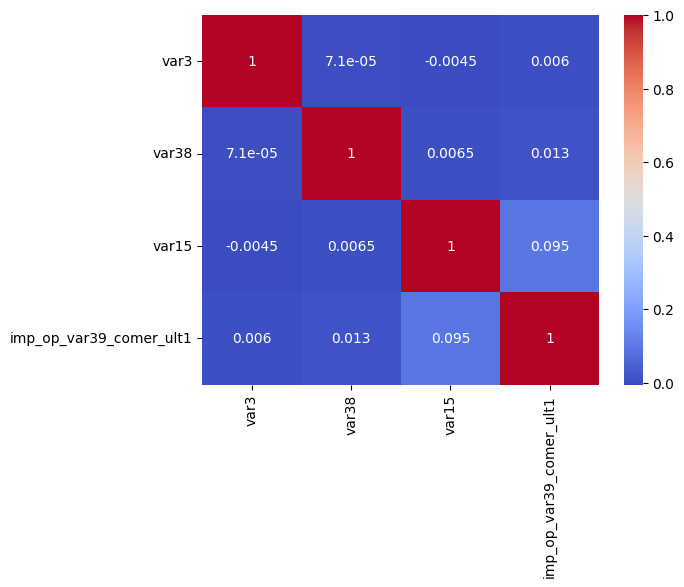

In [3]:
print(df[['var3','var38','var15','imp_op_var39_comer_ult1']].corr())

sns.heatmap(df[['var3','var38','var15','imp_op_var39_comer_ult1']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [4]:
target_corr = df.corr()['TARGET'].sort_values(ascending=False)
print(target_corr)
df.isnull().sum()

TARGET                           1.000000
var36                            0.102919
var15                            0.101322
ind_var8_0                       0.046665
num_var8_0                       0.046622
                                   ...   
num_reemb_var33_hace3                 NaN
num_trasp_var17_out_hace3             NaN
num_trasp_var33_out_hace3             NaN
saldo_var2_ult1                       NaN
saldo_medio_var13_medio_hace3         NaN
Name: TARGET, Length: 371, dtype: float64


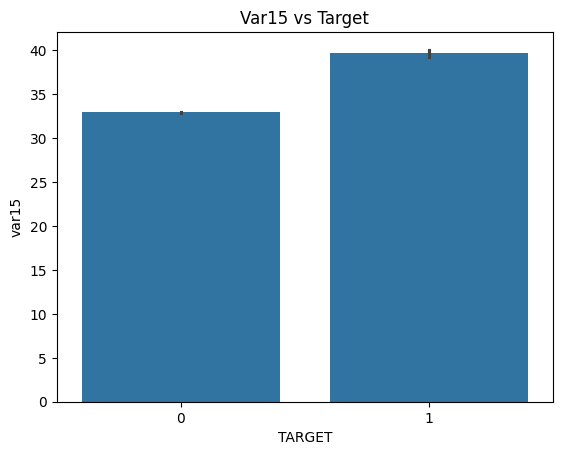

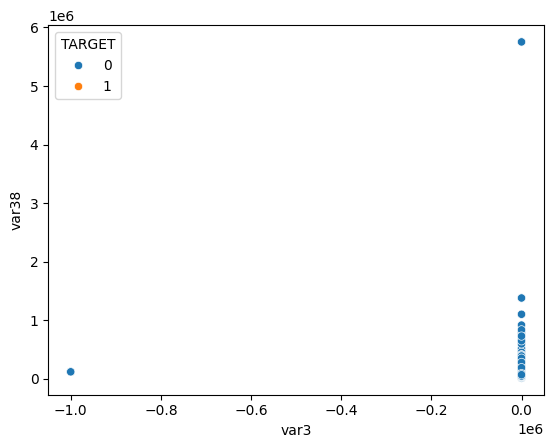

In [5]:
sns.barplot(x='TARGET', y='var15', data=df)
plt.title("Var15 vs Target")
plt.show()
sns.scatterplot(x='var3', y='var38', hue='TARGET', data=df.sample(2000))
plt.show()

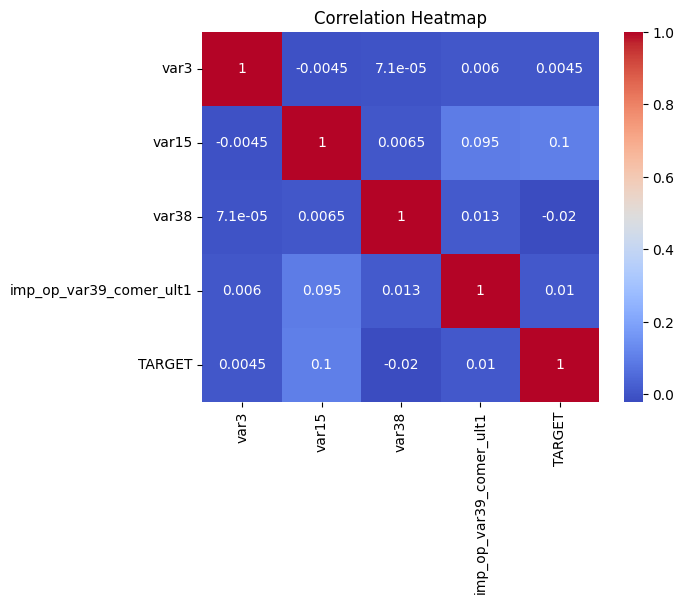

In [6]:
features = ['var3','var15','var38','imp_op_var39_comer_ult1','TARGET']
corr = df[features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
print(df['TARGET'].unique())

print(df['TARGET'].value_counts())


[0 1]
TARGET
0    73012
1     3008
Name: count, dtype: int64


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())


TARGET
0    73012
1    73012
Name: count, dtype: int64


In [9]:
orr_target = df.corr()['TARGET'].abs()
selected_features = corr_target[corr_target > 0.65]
print("Selected features:", selected_features)

NameError: name 'corr_target' is not defined

In [ ]:
from sklearn.feature_selection import SelectKBest

df_copy = df.copy()

X = df_copy.drop('TARGET', axis=1)
y = df_copy['TARGET']

selector = SelectKBest(k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(selected_features.tolist())

df_other_selected = df_copy[selected_features]